# Attendance

[The link to SEAts](https://goldsmithscollege.sharepoint.com/sites/intranet-supporting-students/SitePages/SEAtS--QR-codes-for-check-in.aspx?utm_campaign=SEAtS%20reminder%2027.09.22&utm_source=emailCampaign&utm_content=&utm_medium=email)

[Evaluations!](https://forms.office.com/pages/responsepage.aspx?id=Px9DDcEgHEaVikaynU4CG_MPaGB4XvhInXIkVKebiidUQ0UwSlIyRzU3QU9DR0xKWkE3UU1FM1hOSC4u) 🙏

In [1]:
import os, sys, pathlib
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo

import tensorflow as tf

In [2]:
# reminder: Colab code to mount your drive
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive') # 'My Drive' is the default name of Google Drives
    os.chdir('drive/My Drive/IS53024B-Artificial-Intelligence/8-generative-deep-learning')
    os.listdir() 

---

# 12 Generative deep learning

- ## Text generation
- ## DeepDream
- ## Neural style transfer
- ## Variational autoencoders
- ## Generative adversarial networks


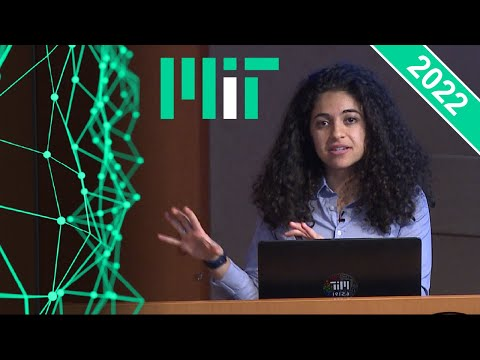

In [3]:
YouTubeVideo('QcLlc9lj2hk', width=853, height=480) # MIT 6.S191: Deep Generative Modeling 

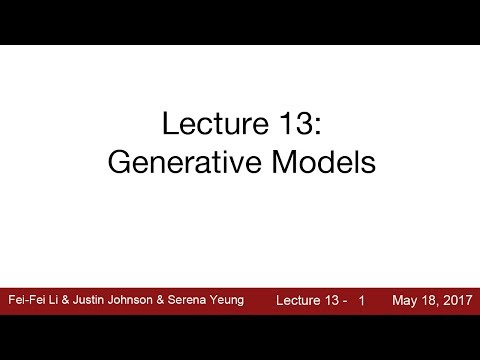

In [4]:
YouTubeVideo('5WoItGTWV54', width=853, height=480) # Stanford CS 231N, Lecture 13 | Generative Models

---

## 12.1 Text generation

“Generating sequential data is the closest computers get to dreaming.”

Alex Graves

NNs can generate new sequence data:

- text (all kinds, including summaries, dialogue);
- music (samples, notes);
- speech synthesis;
- handwriting or brushstrokes recorded on an iPad;
- even images, if considered like a sequence of pixels!

### 12.1.1 A brief history of generative deep learning for sequence generation

- 2002: [Eck & Schmidhuber, "A first look at music composition using LSTM recurrent neural networks"](https://people.idsia.ch/~juergen/blues/IDSIA-07-02.pdf);
- 2013: [Alex Graves, "Generating Sequences With Recurrent Neural Networks"](https://arxiv.org/abs/1308.0850);
- 2015: Google's DeepDream produced psychedelic images: ["Inceptionism: Going Deeper into Neural Networks"](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html);
- 2016: [Sunspring](https://www.youtube.com/watch?v=LY7x2Ihqjmc), an experimental film with an LSTM generated script;
- 2016: DeepMind's [WaveNet: A generative model for raw audio](https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio);
- 2016: Google's [Smart Reply](https://developers.google.com/ml-kit/language/smart-reply) – automatic generation of short replies to emails and text messages.

- 2019: GPT-2 (1.5 bn): ["Better Language Models and Their Implications"](https://openai.com/blog/better-language-models/);
- 2020: GPT-3 (175 bn): ["Language Models are Few-Shot Learners"](https://arxiv.org/abs/2005.14165), and the [API](https://openai.com/api/);
- 2020: [Jukebox](https://openai.com/blog/jukebox/), "a neural net that generates music, including rudimentary singing, as raw audio";
- 2021-2: OpenAI's [WebGPT](https://openai.com/blog/webgpt/), [InstructGPT](https://openai.com/blog/instruction-following/) and [ChatGPT](https://openai.com/blog/chatgpt/).

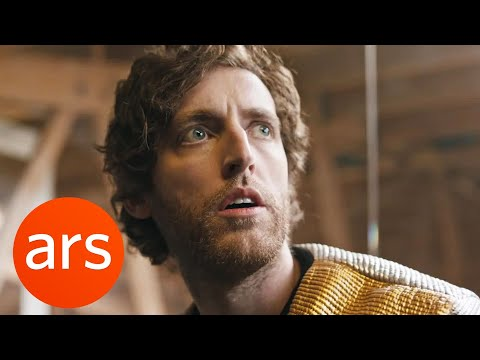

In [2]:
YouTubeVideo('LY7x2Ihqjmc', width=853, height=480) #  Sunspring | A Sci-Fi Short Film Starring Thomas Middleditch

Deep learning algorithms can learn a statistical **latent space**: a structured compression or *distillation* of the data.

That space, like word embeddings, displays remarkable properties, and *can be explored*!

**Sampling from the latent space** 'creates' new artworks similar to the training data.

Chollet claims that this removes the barriers of craft and skills, to allow for more straightforward expression.

In my own experience, I find that it **shifts** the craft and skills needed elsewhere, rather than removing those.

*"What I cannot create, I don't understand."*

Richard P. Feynman

Perhaps another key motivation for Deep Learning researchers and engineers to pursue the generative route.

### The replacement debate

Chollet stands firmly on one end, saying AI will lead to *augmented intelligence*, rather than anything autonomous.

Others claim that AGI is already here, and that it will surpass humanity in a blink of an eye.

I encourage you to try out [ChatGPT](https://openai.com/blog/chatgpt/) and see what you think.

#### Question

Players of chess, Go and StarCraft/Dota 2 now live with the idea that there is a machine somewhere that is likely **always** to be better than them. This certainly does not seem to have happened for the arts, but what if it did? What would be the consequences for art and artists?

---

### 12.1.2 How do you generate sequence data?


Train a network to predict the next token(s) in a sequence using the previous tokens as input.

Source for tokens:  words, characters, samples, pixels, byte.

Any *text-based* model is known as a **language model**.

A language model captures the *latent space* of language i.e. its **statistical structure**.

### Auto-regressive generation

<!-- ![Chollet, text generation](images/chollet.auto-regressive.p.367.png) -->
<img src="https://drive.google.com/uc?id=1UBhqXJLbtyrY0lKwIh-v98jmhQdZVc06">

<small>DLWP, p.368</small>

### Text generation workflow

1. Train model;
2. Present an initial *conditioning* text string (aka **prompt** or **context**);
3. Model predicts the **probability distribution** for the next token;
4. Sample from that distribution;
4. Add the generated text to the input text;
5. Go back to step 3.

---

### 12.1.3 The importance of the sampling strategy

The **vanilla** way would be just to sample from the softmax output of the model (a probability distribution over the vocab).

This is already smarter than **uniform sampling**, where each token has the same probability (maximum randomness)!

However, we can actually vary the softmax itself (the shape of the probability), to **increase** or **decrease** the level of randomness.

These *intermediate levels of randomness* are controlled by the **softmax temperature** – a fundamental tool for more interesting, creative outputs.

### Softmax temperature

Remember, the softmax function is: 

$$
\bbox[5px,border:2px solid red]
{
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_i e^{x_i}}
}
$$

$x_i$: logits (scores) for each token in our vocabulary.


It makes all numbers positive and normalises them (all lie between 0 and one and sum to 1) → they are turned into a **probability distribution**.

The parameterised softmax distribution adds a number $T$ like so:

$$
\bbox[5px,border:2px solid red]
{
\text{softmax}(x_i) = \frac{e^{\frac{x_i}{T}}}{\sum_i e^{\frac{x_i}{T}}}
}
$$

### Usual values for $T$

Depends on the model!

Around 0.9 (most of the time above 0.7, rarely above 1. unless you yearn for delirium!)

**Reweighting a probability distribution to a different temperature**

Note that here we use the `log` to (half-)revert the effect of the softmax that the model operates already on its final logits.  In other architectures, the model outputs pre-softmax logits, so you do not need that step and directly divide by the temperature.

In [20]:
def reweight_distribution(original_distribution, temperature=0.5):
    """
    1.a LOG: because `original_distribution` has been softmaxed! (Numerical stability)
      b divide by TEMPERATURE: our reweighting
    2. SOFTMAX: a. exponentiate
                b. divide by the total

    Notes:
        - In many implementations, the log isn't there because the model returns
          logits (before softmax)
        - the last two lines could also be written: `tf.nn.softmax(distribution)`!
    """
    distribution = np.log(original_distribution) / temperature # 1.a + b
    distribution = np.exp(distribution)                        # 2.a
    return distribution / np.sum(distribution)                 # 2.b


### Limit cases

1. $T \rightarrow 0$:  
    $softmax(x_i)$ becomes just $max(x_i)$: the maximum probability dominates – also known as **greedy sampling**;    
    *If the temperature is too low, the model will tend to repeat itself!* (more 'conservative', less creative)...  
    
    
    
2. $T \rightarrow \infty$:  
    $e^{\frac{x_i}{T}} \rightarrow 1$ so $q_i \rightarrow \frac{1}{M}$ where $M$ is the number of softmax outputs – a **uniform distribution** (our well-known **random guess**);  
    *If the temperature is too high, the model will tend to 'derail' and stop making sense!*  
    (The formalisation of the link between creativity and madness? Σ(▼□▼メ)...
    

### Greedy sampling

Always select the **most probable** step. This is called greedy because it is *exactly* the problem you face in real life: pick the best option **now** (= highest reward in the next step) vs have a more long-term strategy (which brings more payoffs in nearly every case).

In [24]:
def plot_softmax_temperature():
    nums = tf.random.uniform(shape=(10,))                           # ten random numbers
    nums = tf.math.log(nums)                                        # take the log (optional)
    probs = tf.nn.softmax(nums)                                     # turned into probabilities

    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16,12))

    ax1.bar([str(x) for x in range(nums.shape[0])], nums)           # our ten numbers
    ax1.set_title("Log of ten random numbers")
    ax1.set_ylabel("Original range")

    ax2.bar([str(x) for x in range(probs.shape[0])], probs)         # the probabilities
    ax2.set_title("Turned into probabilities")
    ax2.set_ylabel("From zero to one")
    ax2.set_ylim([0,1])

    temp = 0.1                                                      # LOW temperature → very unequal/spiked results
    weighted_nums = nums / temp                                     # reweighting
    probs = tf.nn.softmax(weighted_nums)                            # turned into probabilities

    ax3.bar([str(x) for x in range(probs.shape[0])], weighted_nums) # the probabilities
    ax3.set_title(f"Reweigted by temperature {temp}")
    ax3.set_ylabel("Increased range")

    ax4.bar([str(x) for x in range(probs.shape[0])], probs)         # the probabilities
    ax4.set_title("The distribution is more spiked: likelier tokens will almost always get picked")
    ax4.set_ylabel("From zero to one")
    ax4.set_ylim([0,1])

    temp = 10                                                       # HIGH temperature → very equal/flat results
    weighted_nums = nums / temp                                     # reweighting
    probs = tf.nn.softmax(weighted_nums)                            # turned into probabilities

    ax5.bar([str(x) for x in range(probs.shape[0])], weighted_nums) # the probabilities
    ax5.set_title(f"Reweigted by temperature {temp}")
    ax5.set_ylabel("reduced range")

    ax6.bar([str(x) for x in range(probs.shape[0])], probs)         # the probabilities
    ax6.set_title("The distribution is more flat: less likely tokens will be picked alongside likelier ones")
    ax6.set_ylabel("From zero to one")
    ax6.set_ylim([0,1])

    plt.show()

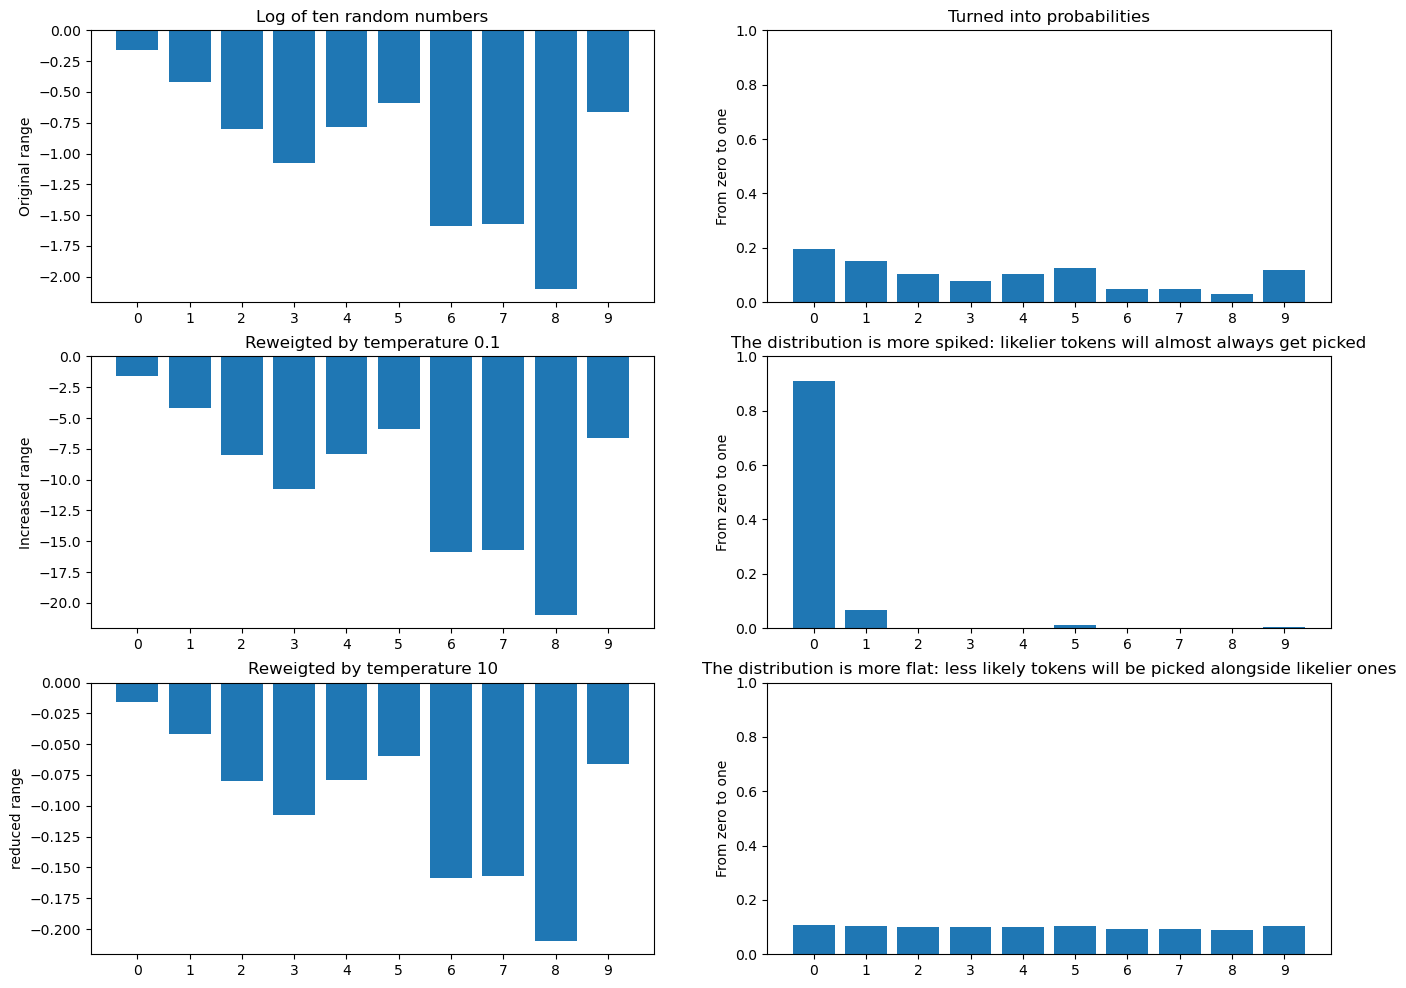

In [25]:
plot_softmax_temperature()

#### More Sampling

Sampling is usually combined with more techniques (it's an active area of research, as usual)

- **Beam search**: generate several branches and iteratively select only the n best ones;  
- **Top k sampling**: sample among the most k probable tokens;  
- **Top p (nucleus) sampling**: sample among the most probable token which, combined, amount to a probability of p;  

[Patrick von Platen, "How to generate text: using different decoding methods for language generation with Transformers"](https://huggingface.co/blog/how-to-generate)

---

### 12.1.4 Implementing text generation with Keras

#### Chollet's example: IMDB reviews

**Downloading and uncompressing the IMDB movie reviews dataset**

```bash
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
```

Note that if you already downloaded this data for previous experiments, you can create a symlink:
```bash
ln -s path/to/aclImdb [newName]
```

**Creating a dataset from text files (one file = one sample)**

In [7]:
dataset = tf.keras.utils.text_dataset_from_directory(
    directory="aclImdb", label_mode=None, batch_size=256
)
dataset = dataset.map(lambda x: tf.strings.regex_replace(x, "<br />", " "))

Found 50006 files belonging to 1 classes.


In [8]:
basedir = pathlib.Path("text-generation")
if not basedir.is_dir():
    os.mkdir(basedir)

#### Data processing

**Preparing a `TextVectorization` layer**

Using the [`tf.keras.layers.TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) layer.

In [9]:
sequence_length = 100
vocab_size = 15000
text_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=vocab_size,  
    output_mode="int",
    output_sequence_length=sequence_length,
)
text_vectorization.adapt(dataset)
tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

**Setting up a language modeling dataset**

<!-- ![Chollet seq2seq learning](images/chollet.seq2seq-learning.p.372.png) -->

<img src="https://drive.google.com/uc?id=1LUIHGV5IDF9t9RaTsz7iC5HgQPLYiknd">

<small>DLWP, p.372</small>

In [10]:
def prepare_lm_dataset(text_batch):
    vectorized_sequences = text_vectorization(text_batch)  # highly parallelised training with Transformers:
    x = vectorized_sequences[:, :-1]                       # [ a b c d e f g] the model predicts top to bottom,
    y = vectorized_sequences[:, 1:]                        # [b c d e f g h] a→b, b→c, ..., in one go!
    return x, y

lm_dataset = dataset.map(prepare_lm_dataset, num_parallel_calls=4)

#### The Transformer Decoder

In [27]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        # token embeddings: semantic information
        self.token_embeddings =tf.keras.layers.Embedding(
            input_dim=input_dim, output_dim=output_dim
        )
        
        # position embeddings: syntactic (spatial/temporal) information
        self.position_embeddings =tf.keras.layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim
        )

        # more params
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        embedded_tokens = self.token_embeddings(inputs)
        positions = tf.range(start=0, limit=length, delta=1) # delta: step size
        embedded_positions = self.position_embeddings(positions)
        # both embeddings are simply added together!
        return embedded_tokens + embedded_positions
                                               # Turns int sequences into a mask, example:
    def compute_mask(self, inputs, mask=None): # [ 12   3    54   3    0     0     ]
        return tf.math.not_equal(inputs, 0)    # [ True True True True False False ]

    def get_config(self): # retrieve config as a dict
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

In [13]:
def get_causal_attention_mask(inputs):
    print("Inputs:")
    print(inputs)
    print()
    input_shape = tf.shape(inputs)
    batch_size, sequence_length = input_shape[0], input_shape[1]
    i = tf.range(sequence_length)[:, tf.newaxis]
    j = tf.range(sequence_length)
    print(f"i:\n{i}")
    print()
    print(f"j:\n{j}")
    print()
    mask = tf.cast(i >= j, dtype="int32")
    print("Is i >= i? Boolean cast to ints. (Note the broadcasting)")
    print()
    print(mask)
    print()
    mask = tf.reshape(mask, (1, input_shape[1], input_shape[1])) # adding a batch dimension
    mult = tf.concat(
        [tf.expand_dims(batch_size, -1),
         tf.constant([1, 1], dtype=tf.int32)], axis=0)
    print("We want mask to have the same dims as input, using `tf.tile`.")
    print("Creating the right multiplier for it:")
    print()
    print(mult)
    print()
    tile = tf.tile(mask, mult)
    print("Final mask with batch dimensions:")
    print()
    print(tile)
    return tile

mask = get_causal_attention_mask(tf.random.uniform(shape=(2,10), maxval=50, dtype=tf.int32))

Inputs:
tf.Tensor(
[[34 40 43 44  3 24 32 24 48  5]
 [11 19 46 14 26 19 43  6 44 11]], shape=(2, 10), dtype=int32)

i:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]

j:
[0 1 2 3 4 5 6 7 8 9]

Is i >= i? Boolean cast to ints. (Note the broadcasting)

tf.Tensor(
[[1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1]], shape=(10, 10), dtype=int32)

We want mask to have the same dims as input, using `tf.tile`.
Creating the right multiplier for it:

tf.Tensor([2 1 1], shape=(3,), dtype=int32)

Final mask with batch dimensions:

tf.Tensor(
[[[1 0 0 0 0 0 0 0 0 0]
  [1 1 0 0 0 0 0 0 0 0]
  [1 1 1 0 0 0 0 0 0 0]
  [1 1 1 1 0 0 0 0 0 0]
  [1 1 1 1 1 0 0 0 0 0]
  [1 1 1 1 1 1 0 0 0 0]
  [1 1 1 1 1 1 1 0 0 0]
  [1 1 1 1 1 1 1 1 0 0]
  [1 1 1 1 1 1 1 1 1 0]
  [1 1 1 1 1 1 1 1 1 1]]

 [[1 0 0 0 0 0 0 0 0 0]
  [1 1 0 0 0 0

In [28]:
class TransformerDecoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim                              # parameters
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = tf.keras.layers.MultiHeadAttention(  # multi-head attention
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = tf.keras.Sequential(                  # dense layer on top: like a nonlinearity
            [tf.keras.layers.Dense(dense_dim, activation="relu"),
             tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization() # layer norm
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.LayerNormalization()
        self.supports_masking = True                            # MASK: enforcing causality

    # retrieve config as a dict (necessary for custom Keras layers)
    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):                           # CAUSAL MASK
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        
        causal_mask = self.get_causal_attention_mask(inputs)               # prepare the causal mask
        if mask is not None:                                               # (as well as the padding mask:
            padding_mask = tf.cast(                                        # ignoring zeros in the input)
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
            
        attention_output_1 = self.attention_1(                             # REGULAR MASKED ATTENTION
            query=inputs,
            value=inputs,
            key=inputs, # ↓ apply the causal mask
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1) # layer norm
        
        attention_output_2 = self.attention_2(                             # CROSS-ATTENTION
            query=attention_output_1,                                      # query: output of DECODER
            value=encoder_outputs,                                         # key:   output of ENCODER
            key=encoder_outputs,                                           # value: output of ENCODER
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(       # layer norm: concatenate both attention matrices
            attention_output_1 + attention_output_2  # cross-attention (encoder) + regular masked attention (decoder)
        )
        proj_output = self.dense_proj(attention_output_2)                  # dense net / nonlinearity
        return self.layernorm_3(attention_output_2 + proj_output)

**A simple Transformer-based language model**

In [30]:
embed_dim = 256
latent_dim = 2048
num_heads = 2

learning_rate = 0.001 
print(f"learning rate: {learning_rate}")

def build_model(embed_dim, latent_dim, num_heads):
    inputs = tf.keras.Input(shape=(None,), dtype="int64")
    x = PositionalEmbedding(sequence_length,vocab_size, embed_dim)(inputs)
    x = TransformerDecoder(embed_dim, latent_dim, num_heads)(
        inputs=x, encoder_outputs=x # we use x as both encoder & decoder input!
    )
    outputs =tf.keras.layers.Dense(vocab_size, activation="softmax")(x) # probability distribution over the vocab
    model = tf.keras.Model(inputs, outputs)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.RMSprop(learning_rate),
    )
    return model

model = build_model(embed_dim, latent_dim, num_heads)

learning rate: 0.001


In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_2 (Positi  (None, None, 256)   3865600     ['input_3[0][0]']                
 onalEmbedding)                                                                                   
                                                                                                  
 transformer_decoder_2 (Transfo  (None, None, 256)   2104576     ['positional_embedding_2[0][0]', 
 rmerDecoder)                                                     'positional_embedding_2[0][0]'] 
                                                                                            

---

### 12.1.5 A text-generation callback with variable-temperature sampling

In [15]:
def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature                 # temperature reweighting
    exp_preds = np.exp(predictions)                                 # these two lines are actually
    predictions = exp_preds / np.sum(exp_preds)                     # a softmax
    probas = np.random.multinomial(1, predictions, 1)               # sampling using our probabilities
    return np.argmax(probas)

class TextGenerator(tf.keras.callbacks.Callback):
    def __init__(self,
                 prompt,                                            # initial context
                 generate_length,                                   # how many words to generate
                 model_input_length,
                 temperatures=(1.,),                                # a range of different temperatures
                 print_freq=50):
        self.prompt = prompt
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq

    def on_epoch_end(self, epoch, logs=None):
        print()
        print("EPOCH", epoch)
        print()
        if epoch % self.print_freq != 0:
            return
        print()
        print("-" * 40)
        for temperature in self.temperatures:
            msg = f"temperature {temperature}"
            print(msg)
            print("-" * len(msg))
            sentence = self.prompt                                  # start with our prompt
            for i in range(self.generate_length):
                tokenized_sentence = text_vectorization([sentence]) # encode the sentence & feed to the model
                predictions = self.model(tokenized_sentence)        # which gives us predictions
                next_token = sample_next(predictions[0, i, :])      # use these to sample (get the index)
                sampled_token = tokens_index[next_token]            # use the index to pick the token
                sentence += " " + sampled_token                     # add it to our sentence
            print(sentence)
            print()
        print("-" * 40)


prompt = "This movie"
text_gen_callback = TextGenerator(
    prompt,
    generate_length=100,
    model_input_length=sequence_length,
    temperatures=(0.2, 0.5, 0.7, 1., 1.5), # a diverse range of temperature to see its effect
    print_freq=50,
)

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    basedir / "gpt.{epoch}.keras",
    monitor="loss",
    save_best_only=True
)

### Training

**Fitting the language model**

In [7]:
epochs = 200 

model.fit(
    lm_dataset,
    epochs=epochs,
    callbacks=[text_gen_callback, ckpt_callback]
)

Epoch 1/200
391/391 [==============================] - 40s 99ms/step - loss: 5.3576
Epoch 2/200
391/391 [==============================] - 39s 100ms/step - loss: 4.8207
Epoch 3/200
391/391 [==============================] - 40s 102ms/step - loss: 4.5938
Epoch 4/200
391/391 [==============================] - 40s 103ms/step - loss: 4.4673
Epoch 5/200
391/391 [==============================] - 40s 102ms/step - loss: 4.3801
Epoch 6/200
391/391 [==============================] - 40s 101ms/step - loss: 4.3138
Epoch 7/200
391/391 [==============================] - 40s 101ms/step - loss: 4.2605
Epoch 8/200
391/391 [==============================] - 40s 102ms/step - loss: 4.2160
Epoch 9/200
391/391 [==============================] - 40s 102ms/step - loss: 4.1780
Epoch 10/200
391/391 [==============================] - 40s 102ms/step - loss: 4.1453
Epoch 11/200
391/391 [==============================] - 40s 102ms/step - loss: 4.1170
Epoch 12/200
391/391 [==============================] - 40s 102m

In [ ]:
def generate(sentence=" ", generate_length=100, temperature=1.):
    for i in range(generate_length):
        tokenized_sentence = text_vectorization([sentence])         # encode the sentence & feed to the model
        predictions = model(tokenized_sentence)                     # which gives us predictions
        next_token = sample_next(predictions[0, i, :], temperature) # use these to sample (get the index)
        sampled_token = tokens_index[next_token]                    # use the index to pick the token
        sentence += " " + sampled_token                             # add it to our sentence
    print(sentence)
generate(sentence="This movie", temperature=.9)

### Temperature recap

- **Low**: extremely repetitive and predictable text, often falls into repetition loops
- **Intermediate**: more interesting, surprising, even creative text – sometimes completely new but plausible words are invented;
- **High** temperature: local structure breaks down and most words look random.

Each model has a sweet spot, but it's usually somewhere in the range 0.7-1., and in my experience more often to be found closer to 0.9!

### Language models and intelligence

What do these models know?? After all, our setup is merely sampling a statistical model of which characters follow other characters...

#### Those in favour

In order to make good predictions, you need to know the structure of language, the world, etc. Language models are a pathway to Artificial General Intelligence.

#### Those against

Ultimately, the network only picks up patterns and repetition, or even further: it finds a way of *compressing* and *memorising* the data. No intelligence there!


### The rise of large language models (LLMs)

Truly remarkable results emerge with very large models. Several companies have all built such models to try and make a business out of it. They have APIs with a free tier that allow you to test these capabilities:

- [OpenAI's ChatGPT](https://openai.com/blog/chatgpt/)  
- [OpenAI's GPT-3](https://openai.com/api/)
- [Cohere](https://cohere.ai/) 
- [GooseAI](https://goose.ai/) (open-source)

#### Tutorial: 

["Text generation with a miniature GPT"](https://keras.io/examples/generative/text_generation_with_miniature_gpt/): pretty much the same as here, with some small variations.  
["Text generation with an RNN"](https://www.tensorflow.org/text/tutorials/text_generation) using an RNN to train an auto-regressive char-level language model (some nice tricks using `tf.data.Dataset`).

#### Reference

One of the most famous blog posts in deep learning, the inspiration for the above tutorial: [Andrej Karpathy, "The Unreasonable Effectiveness of Recurrent Neural Networks"](https://karpathy.github.io/2015/05/21/rnn-effectiveness/).   
[Holtzman et al, "The Curious Case of Neural Text Degeneration"](https://arxiv.org/abs/1904.09751)

---

### 12.1.6 Wrapping up

- We can generate discrete sequence data by training a model to predict the next token(s) given previous tokens;
- **Auto-regressive generation**: the model, conditioned on a sequence, makes a prediction, out of which a token is sampled, that is added to the sequence, and the cycle continues;
- In the case of text, such a model is called a **language model**;
- Language models can be based on **words**, **subwords**, **characters**, **bytes**;
- **Sampling** the next token requires balance between adhering to what the model judges likely, and introducing randomness;
-  **softmax temperature** is one tool, alongside other methods (**beam search**, **top-k/top-p**);
